# ニューラルネットの基礎

ここでは、ニューラルネットとはどのようなものかを学びます。この学習は深層学習の理解につながります。（深層学習というものも基本的にはニューラルネットの１種です。）

まず、ニューロンというものについて簡単に学びます。ニューロンとは脳を形作る細胞のことで、人間の脳はニューロンが多数集まってできています。基本的には多入力・１出力の細胞です。

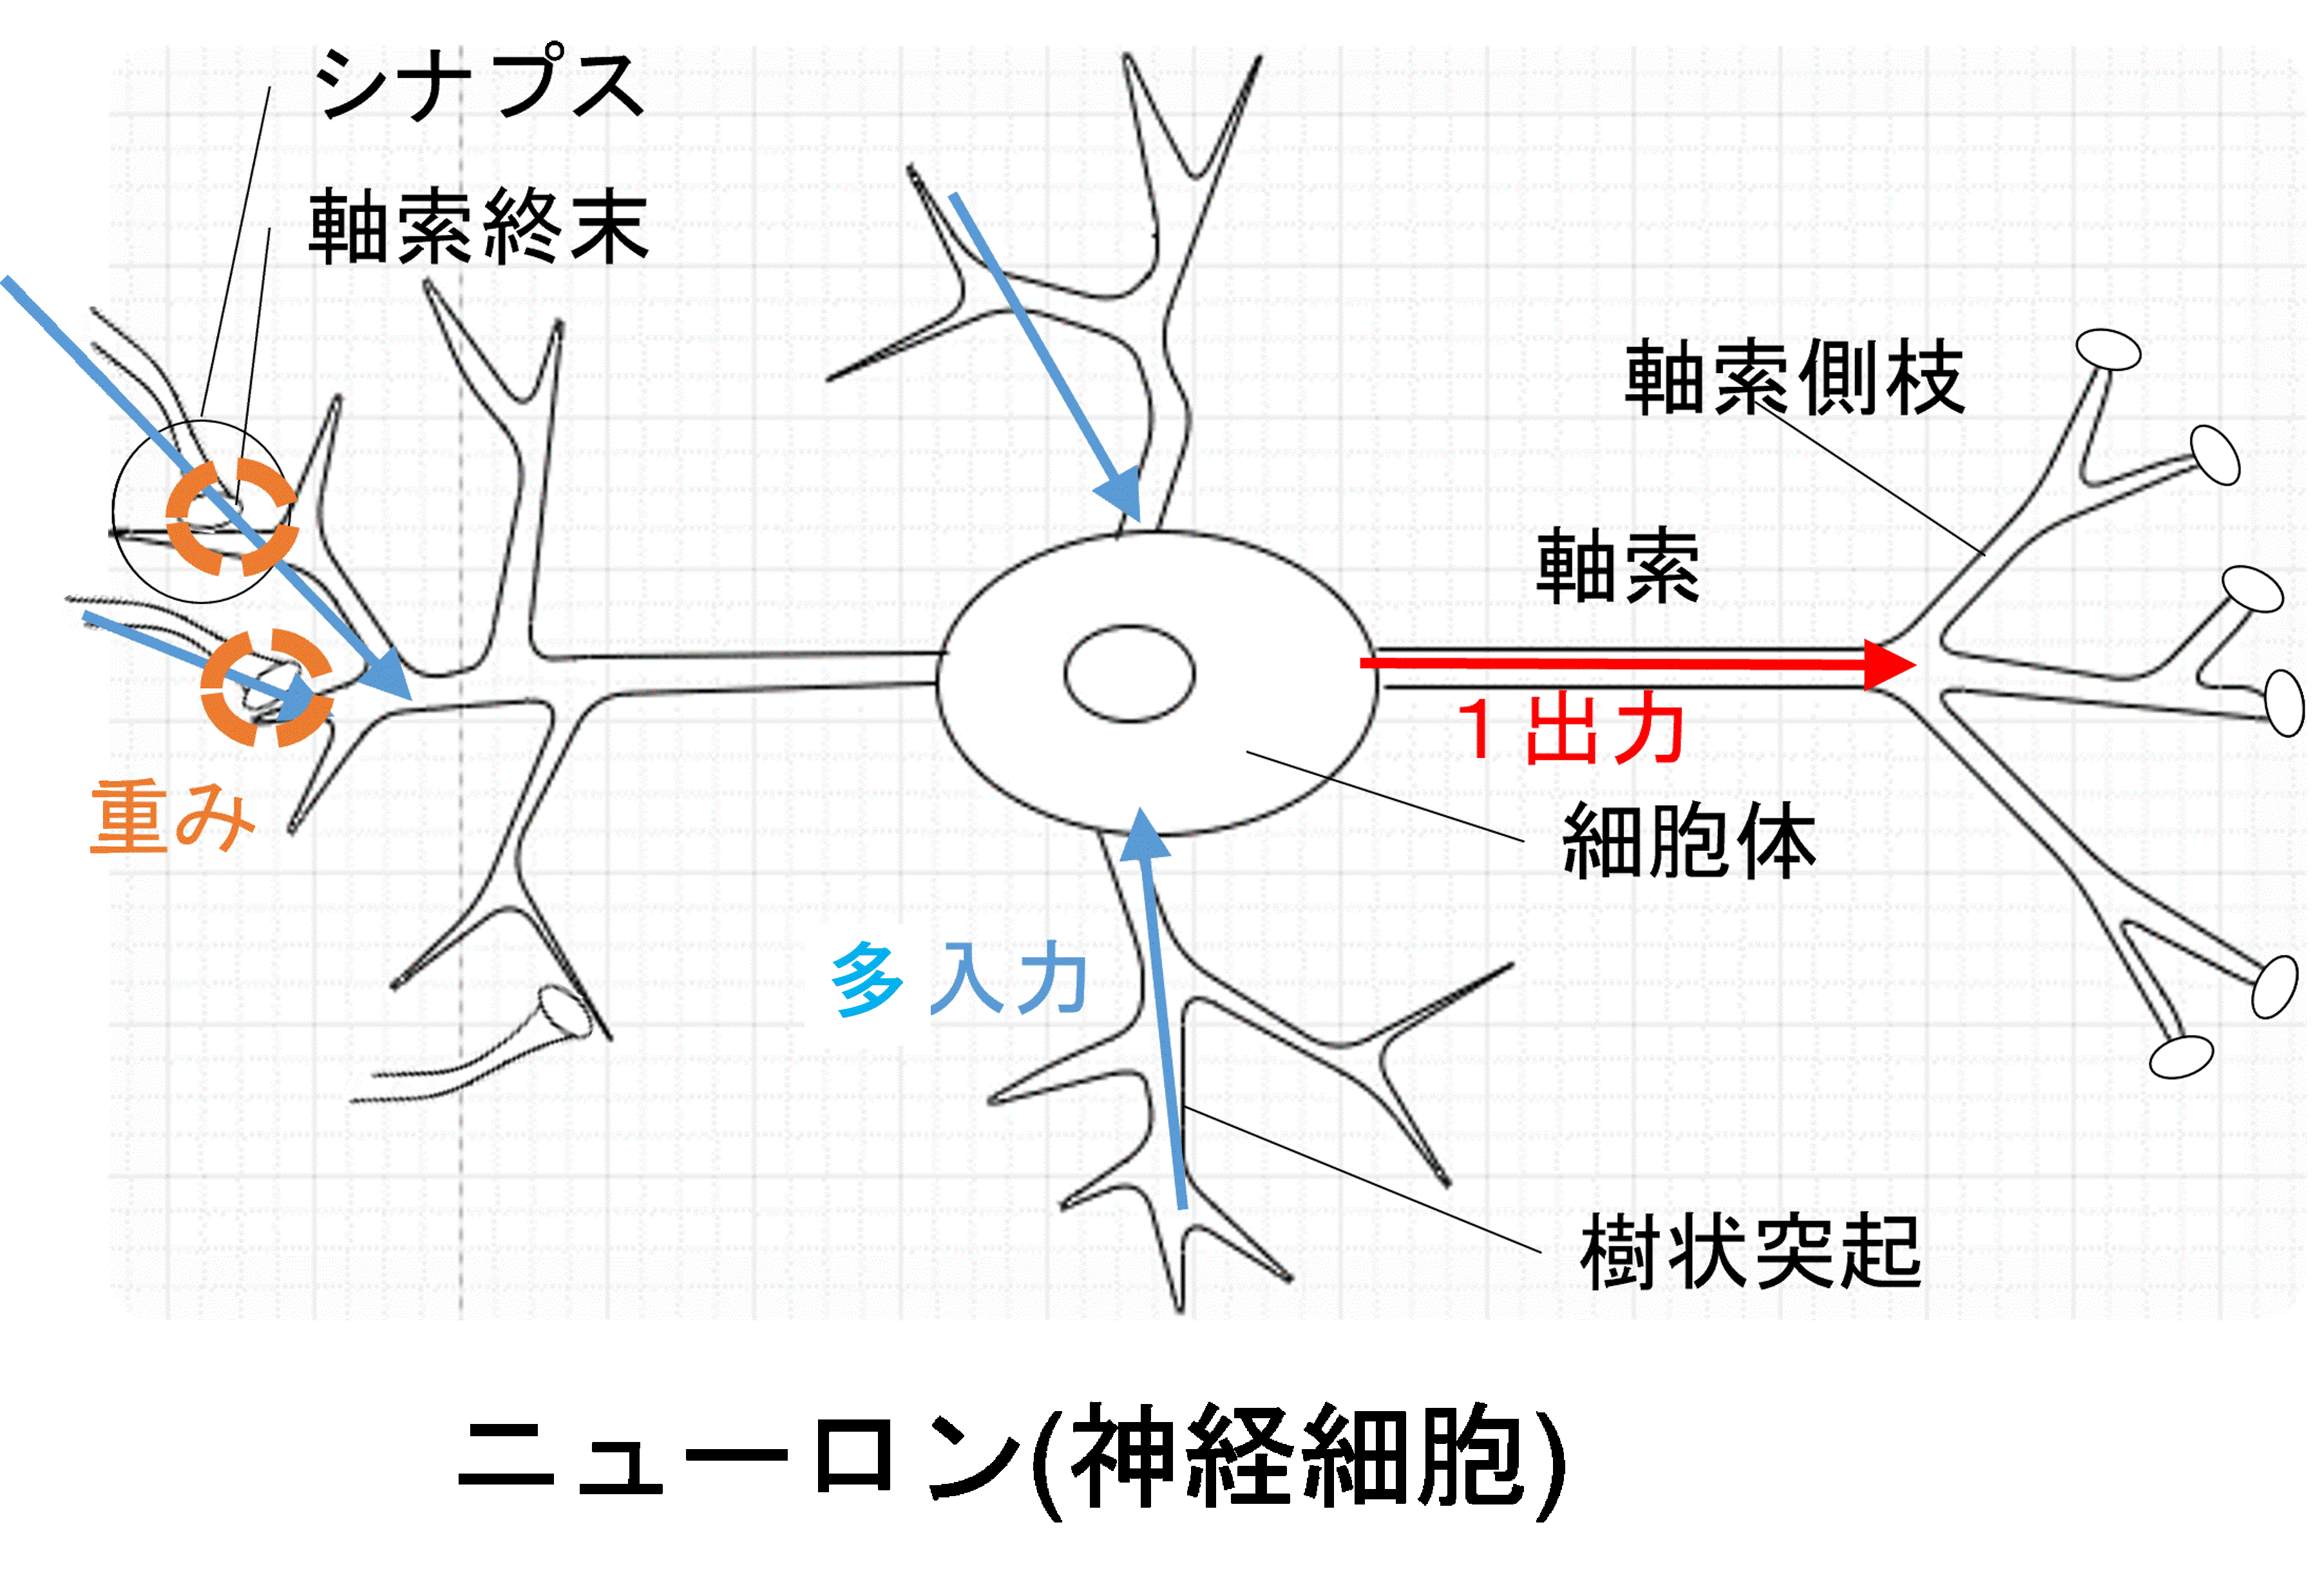

この図のようにニューロンとは多入力で１出力の細胞です。また、多入力には他の細胞の出力との間にシナプス結合があり、重みをかけたようなものになります。この他のニューロンの出力に重みをかけたものが入力され、それらの合計が閾値を超えるとその細胞は発火し出力を出します。（発火していない細胞は出力をだしません。）
この細胞を工学的に応用するものが人工ニューロンです。人工ニューロンは下記の図のようになります。

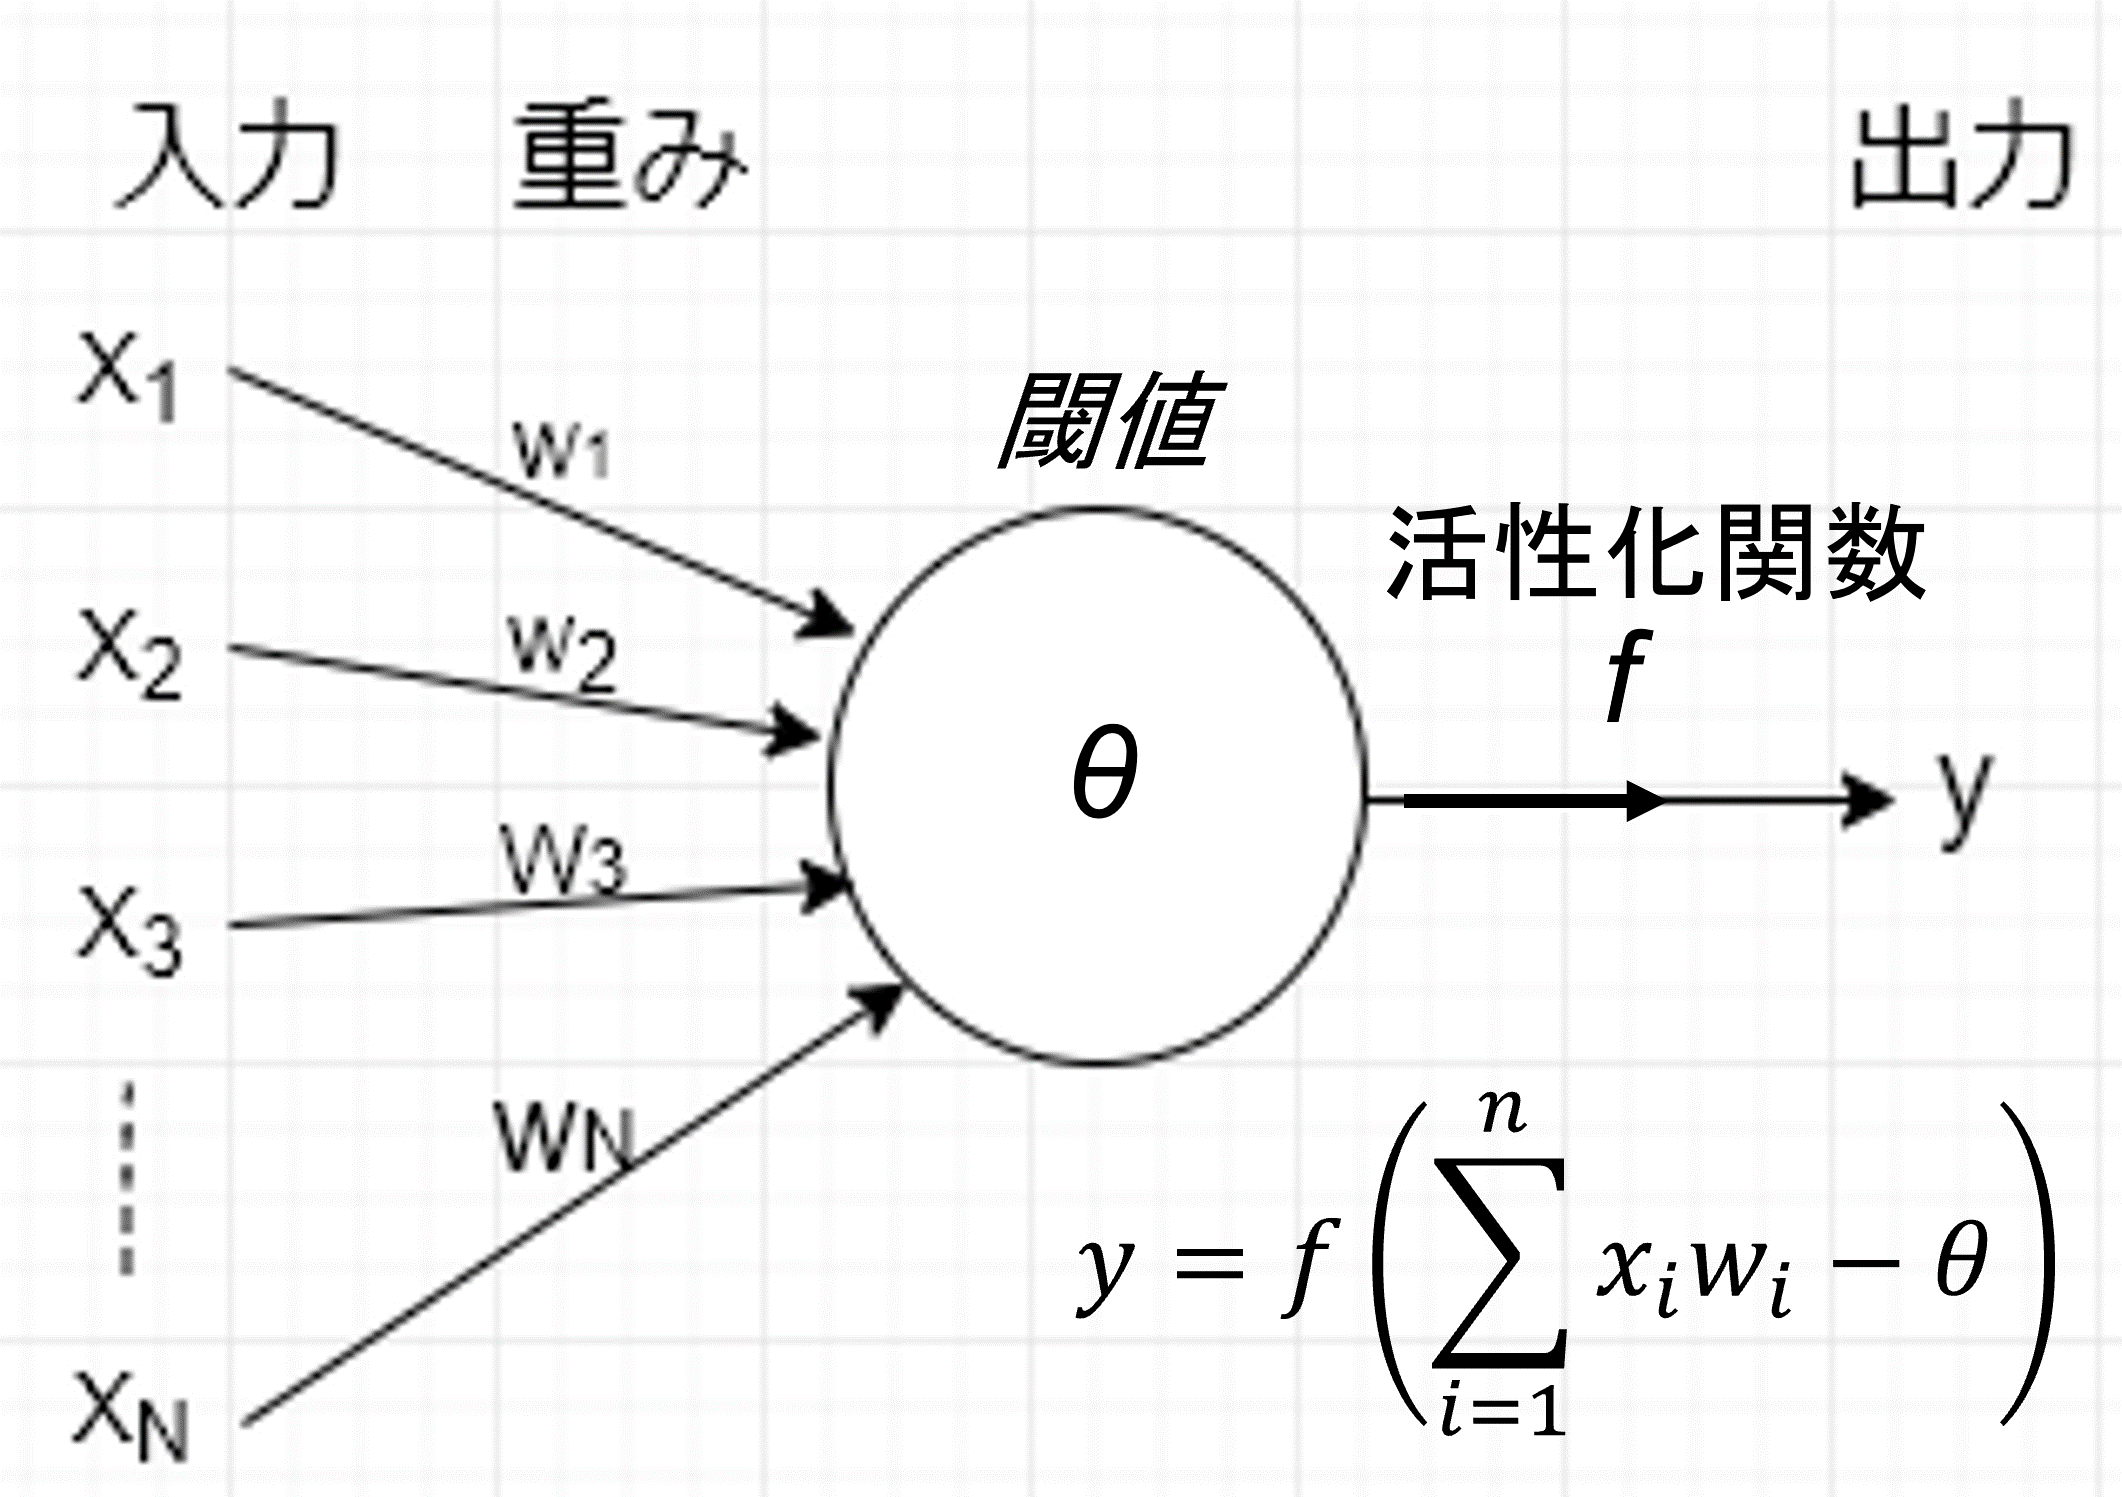

出力ｙの値は入力と重みの（積和演算値ー閾値）の値（u）に対して活性化関数を処理したもの（$f(u)$）となります。積和演算値は、入力ベクトルと重みベクトルの内積で表すことができます。 
下記は基本的な活性化関数の１つであるシグモイド関数です．式は 
$$ \frac{1}{1+\exp(-u)}$$
です．（この関数はuが負の十分大きな値の場合（分母が大きくなり）０に近づく．また，uが正の十分大きな値の場合（分母が１に近づき）１に近づく．） 
下記のプログラムでは入力が[1,2]であり，重みが[0.3,0.2]であり，閾値が-10である．この場合，内積値は0.7となり，活性化関数の入力uは10.7となり，活性化関数の出力は0.999・・・となっている．

In [12]:
import numpy as np

def f(u):  #活性化関数の定義
    return (1/(1+np.exp(-u)))
x=np.array([1,2])  #入力ベクトル
w=np.array([0.3,0.2])  #重みベクトル
print("内積=",x @ w)

th=-10 #閾値
u=x @ w- th  #積和演算値（閾値つき）（入力と重みの積和－閾値）
y=f(u)   #出力
print("活性化関数の入力=",u)
print("活性化関数の出力=",y)

内積= 0.7
活性化関数の入力= 10.7
活性化関数の出力= 0.9999774555703496


### 活性化関数の形

活性化関数は従来のニューラルネットではシグモイド関数を使います。例えば、関数　1/(1+exp(-u))等 です。（上記の関数はシグモイド関数（活性化関数）を計算するものです）  
ここでは活性化関数（シグモイド関数）の形をグラフとして描画してみます。matplotlib.pyplotパッケージを使用することで簡単に描画を行うことができます。  
例えば下記は「plt」の文字(これはインポート文で「as plt」としているので、pltで使えるようになっています)で描画をします。plot()で描画が行われます。また、下記のfor文は全てのaについて繰り返しています。iにはaの各要素（ここでは、a=np.arange(-10.0,10.0,0.1)ですので、aの各要素は-10,-9.9,-9.8,……,9.8,9.9です。）また、b=[]は空のリストを作っています。b.appendで今までのリストに新しい要素が追加されます。

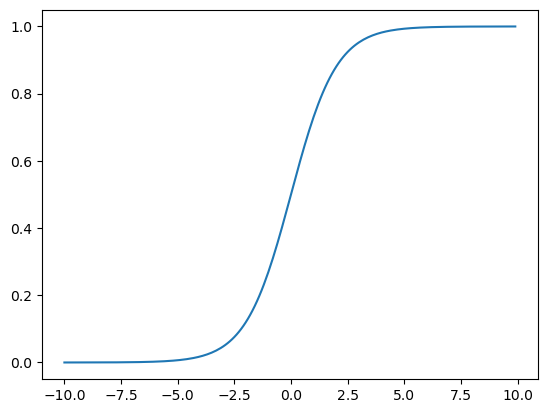

In [13]:
import matplotlib.pyplot as plt
a=np.arange(-10.0,10.0,0.1)
b=[]

for i in a:
    b.append(f(i))
plt.plot(a,b)

### ニューロンの特性


活性化関数にシグモイド関数を使う場合のシグモイド関数の入力と出力の関係は上図のようになります．（入力（＝積和演算値と閾値の差）が負の場合０に近づきます．入力が正の場合１に近づきます．）  
この活性化関数の意味はある直線で２つの部分に分割する機能があります． 
例えば，２二元の入力は２次元のグラフに描くことができます．この２次元のグラフを１本の線で区切って，その線の一方は１に近づき，もう一方は０に近づきます．また，重みと閾値の組み合わせで，その線を境にして急激に値が０から１へ変わるか，緩やかに変わるかが変化します． 
 
ここでは活性化関数（シグモイド関数）が２次元の空間を２つに分ける形をグラフとして描画してみます。 
matplotlib.pyplotパッケージでは，グラフの形を変えることもできます．下記のグラフでは丸の大きさが大きいと１，小さいと０に近くなります．（ある値以下では丸が描かれなくなります．）  
下記のプログラム（と図）では，上のものはc=0.1でゆっくり変化し，下のものはc=10で素早く変化しています．（境目は(x,y)=(0.6,0)と(x,y)=(0,0.6)を結ぶ直線です）


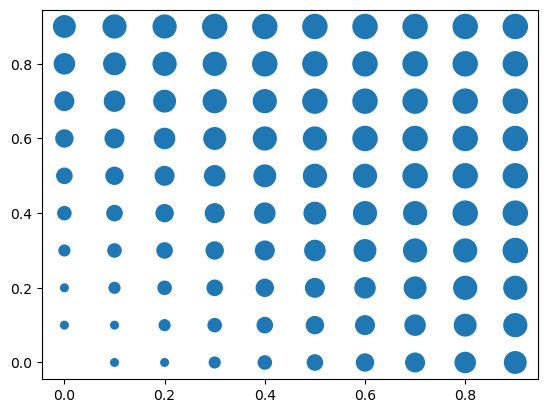

In [14]:
import numpy as np
import matplotlib.pyplot as plt
c=0.5        #重み（２つ）と閾値（１つ）の数値を比率を同じにしたまま，値を変更する比率
#例えば（1,2,3）と（3,6,9）は比率が同じで大きさは３倍
plotx=[]    #x座標（１つの入力の大きさ）
ploty=[]    #y座標（もう１つの入力の大きさ）
plotsize=[] #丸を大きさ
w=[c*10,c*10]  #重みの数値（２つ）
th=c*6      #閾値
for x in np.arange(.0,1.0,0.1):
    for y in np.arange(.0,1.0,0.1):
        plotx.append(x)
        ploty.append(y)
        i=np.array([x,y])
        u=i @ w -th
        o=f(u)            # fはこのファイルの上のセルで定義したシグモイド関数
        size=300*np.round(o,decimals=1)
        plotsize.append(size)   
plt.scatter(plotx,ploty,s=plotsize)

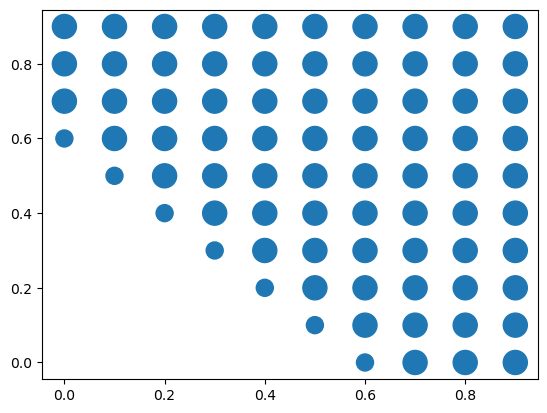

In [15]:
import numpy as np
import matplotlib.pyplot as plt
c=10       #重み（２つ）と閾値（１つ）の数値を比率を同じにしたまま，値を変更する比率
#例えば（1,2,3）と（3,6,9）は比率が同じで大きさは３倍
plotx=[]    #x座標（１つの入力の大きさ）
ploty=[]    #y座標（もう１つの入力の大きさ）
plotsize=[] #丸を大きさ
w=[c*10,c*10]  #重みの数値（２つ）
th=c*6      #閾値
for x in np.arange(.0,1.0,0.1):
    for y in np.arange(.0,1.0,0.1):
        plotx.append(x)
        ploty.append(y)
        i=np.array([x,y])
        u=i @ w -th
        o=f(u)            # fはこのファイルの上のセルで定義したシグモイド関数
        size=300*np.round(o,decimals=1)
        plotsize.append(size)   
plt.scatter(plotx,ploty,s=plotsize)

このニューロンを下図のように結合したものがニューラルネットワークです。

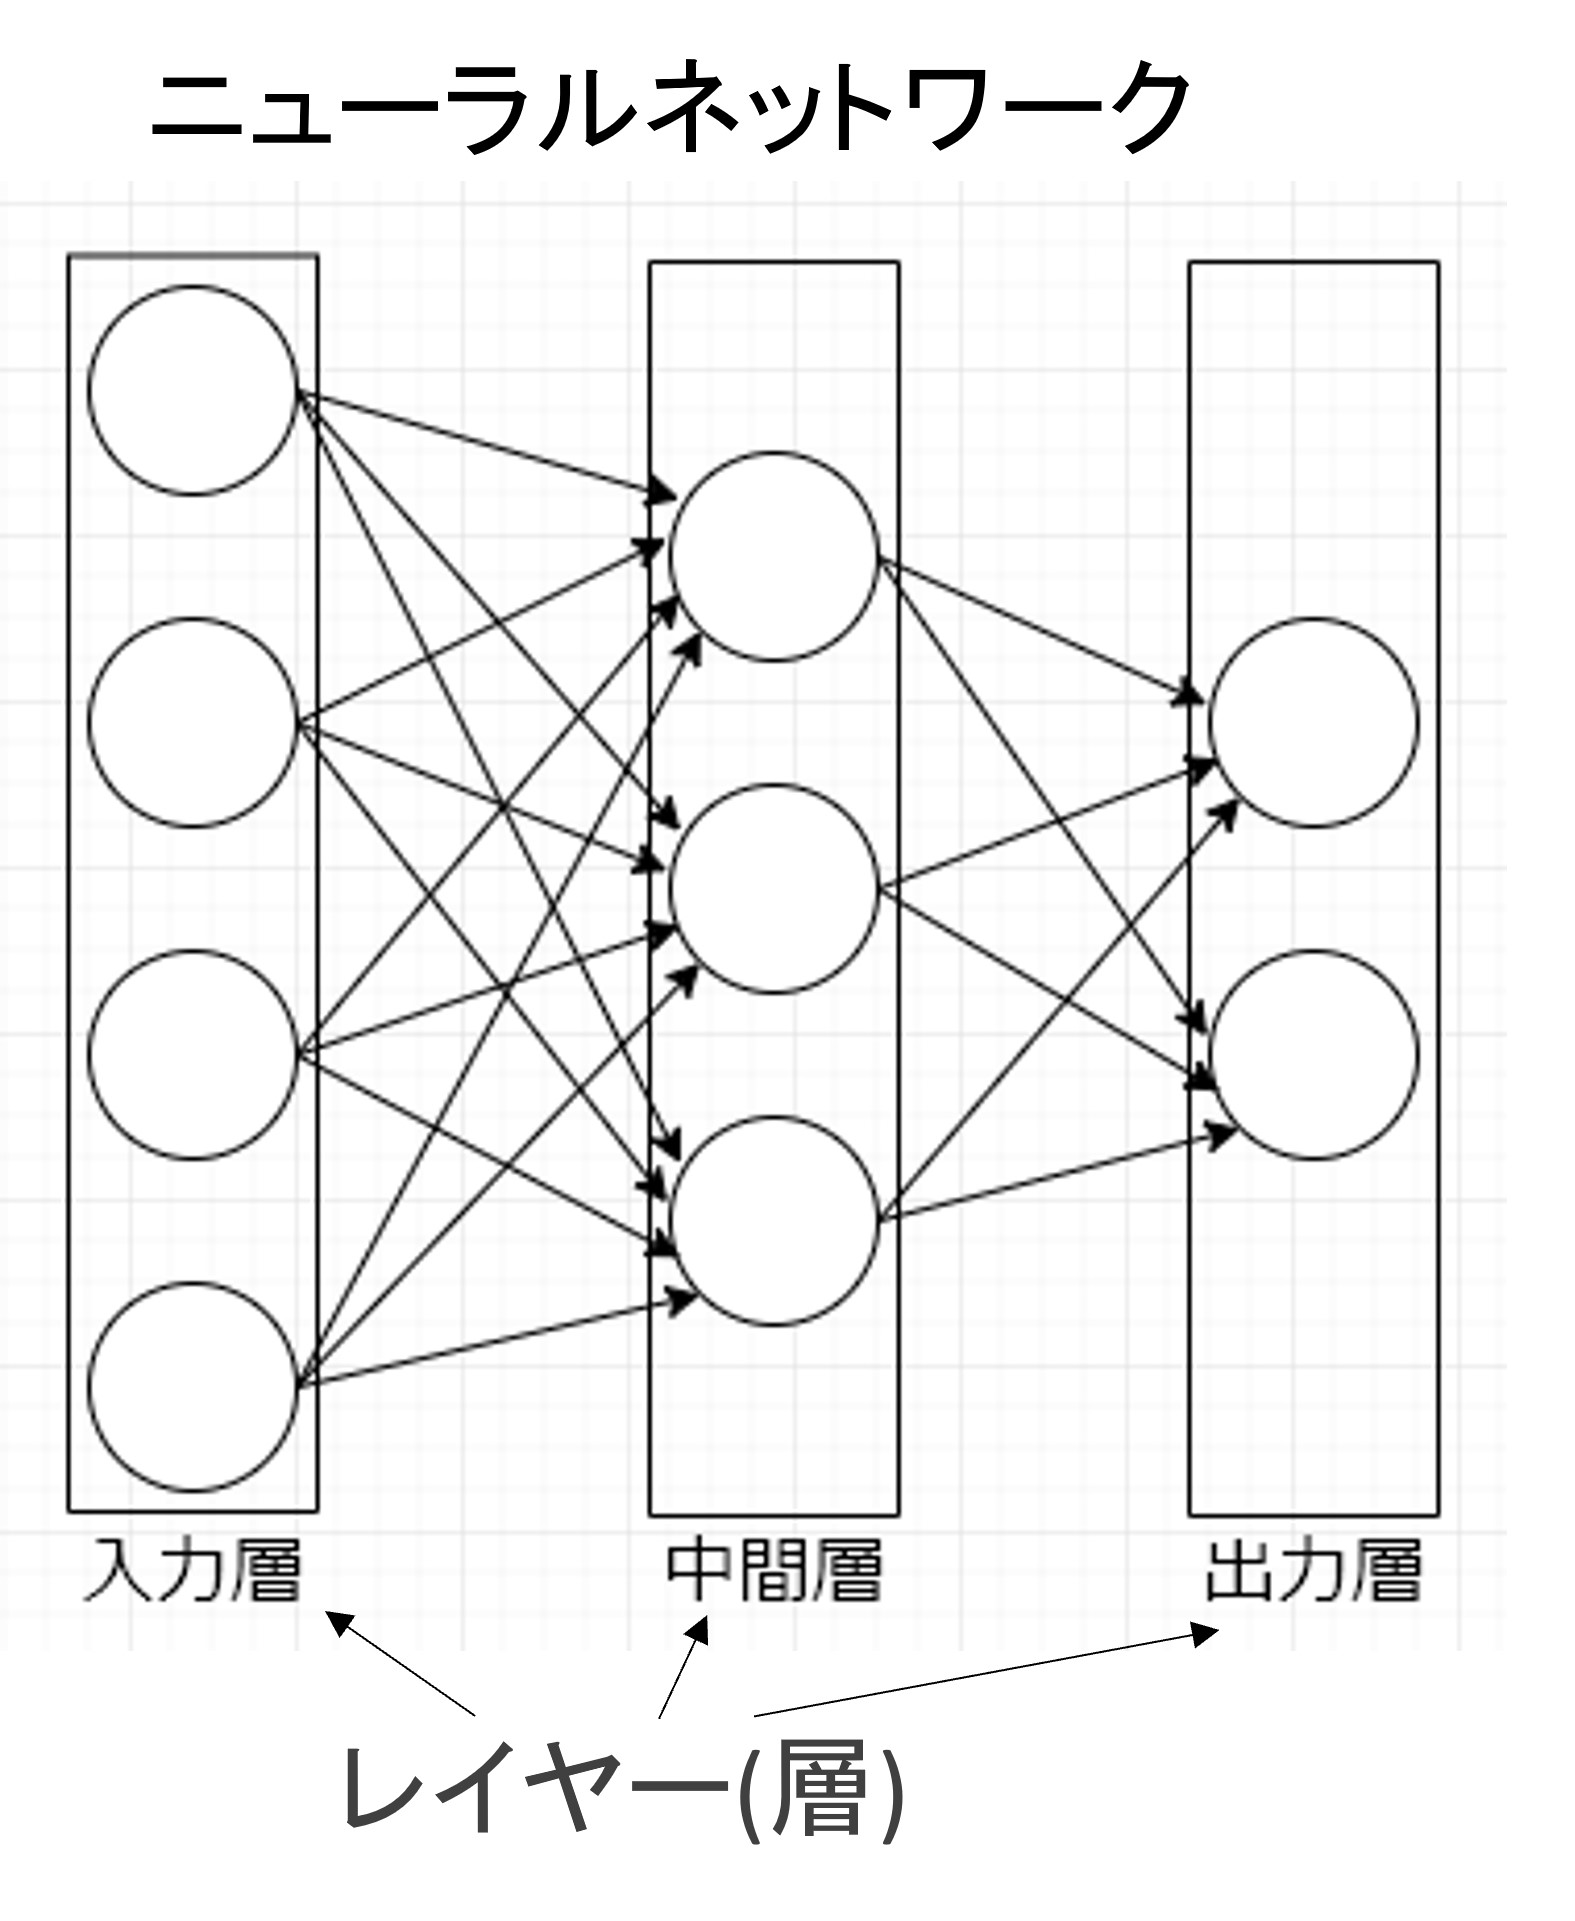

## 課題
    下図のような２入力１出力の回路を作成せよ。ただし、内部には３個のニューロンがある。各ニューロンは２入力１出力とし、３個のニューロンを２層として初めの層を２個、最後の層を１個とする。つまり、始めの層の２個のニューロンへの入力は２入力の値、次の層の２入力の値は初めの層の２個のニューロンの出力とし、後ろの層の１個の出力が回路の出力となる。また、各ニューロンの重みと閾値（全部で９個のパラメータ）はXORを出力できるように設定せよ。（つまり入力が[0,0]の時は出力が0（０近く）,入力が[0,1]の時は出力が1（１近く）,入力が[1,0]の時は出力が1（１近く）,入力が[1,1]の時は出力が0（０近く）となるように設定する。）（課題のコードは最後のセルに入れる。また、確認では課題のコードのみを動かすため、import文はそのままにしておく。（import matplotlib.pyplot as pltを使って２入力（X軸とY軸とする．）に対して１出力（丸の大きさとする．）を表示するソースとすること．）

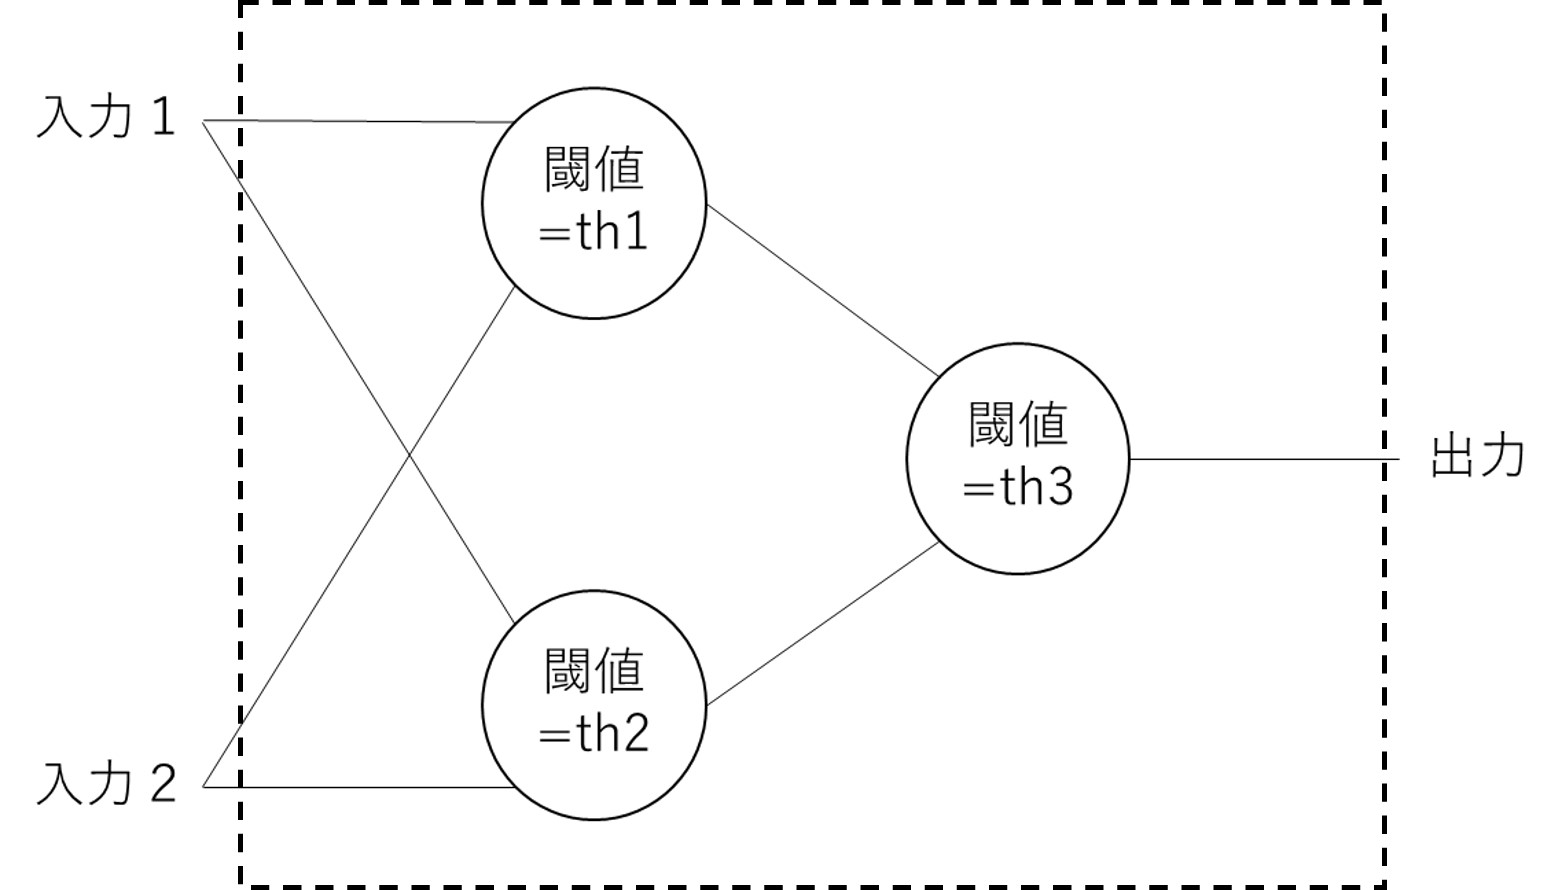

### 補足
各ニューロンでは閾値を扱うが、これは常に―１が入力されるものがあり、その重みと考えることもできる。（下記参照）

$$\sum_{i=1}^{i=n}{w_i*x_i - th}=\sum_{i=1}^{i=n+1}{w_i*x_i}（ただしn:入力の数,x_{n+1}=-1）$$


#### 上記左の式の場合(xを入力としてwとthは決まっているとした場合）

In [2]:
import numpy as np
w=np.array([0.1,0.2])
th=0.3
def f1(x):
    u = w @ x -th
    return u

print(f1([1,2]))

0.2


#### 上記右の式の場合

例１）呼び出すとき（下記７行目）にリストの最後に―１を加えている．

In [3]:
import numpy as np
w=np.array([0.1,0.2,0.3]) #ここでは0.3がthの意味となる．
def f2(x):
    u = w @ x
    return u

print(f2([1,2,-1]))

0.2


例２）－１を加える機能を関数f2の中に入れ，呼び出すときには－１のないリストを渡している．

In [4]:
import numpy as np
w=np.array([0.1,0.2,0.3]) #ここでは0.3がthの意味となる．
def f2(x):
    x.append(-1)
    u = w @ x
    return u

print(f2([1,2]))

0.2


### 補足２
pythonで多次元配列を規定するには
a=[[1,2,3],[4,5,6]] のようにする。また、リストでなくnumpy配列とする時には、a=np.array([[1,2,3],[4,5,6]])とする。（リストではエラーとなり、numpy配列ではエラーとならない時がある。）

In [5]:
a=[[1,2,3],[4,5,6]]
print(a)
b=np.array([[1,2,3],[4,5,6]])
print(b)

[[1, 2, 3], [4, 5, 6]]
[[1 2 3]
 [4 5 6]]


### 補足３

Pythonは基本的にすべての変数はオブジェクト（ポインタで指示しているようなもの）なので，関数を定義して関数内で利用した内容は下記例１のように残ってしまう．（例１では関数内でリストに―１をappendしているが，同じ変数を使って２回目呼び出した時に，リストにはー１が２つある．例２では異なる変数のため，そのようにはならない．）　それを避けるためには関数内で変数を使う前にcopy()関数を使うと，別のものとして扱われる．

#### 例１）同じ変数へ関数内で操作を行った場合

In [7]:
def f(x):
    x.append(-1)
    print('id(x)=',id(x))
    return x

a=[1,2]
print('a=',a)
f(a)
print('a=',a,'：関数呼び出し１回目の後')
f(a)
print('a=',a,'：関数呼び出し２回目の後')
f(a)
print('a=',a,'：関数呼び出し３回目の後')


a= [1, 2]
id(x)= 4738928832
a= [1, 2, -1] ：関数呼び出し１回目の後
id(x)= 4738928832
a= [1, 2, -1, -1] ：関数呼び出し２回目の後
id(x)= 4738928832
a= [1, 2, -1, -1, -1] ：関数呼び出し３回目の後


#### 例２）変数が異なる場合

In [12]:
def f(x):
    x.append(-1)
    print('id(x)=',id(x))
    return x

a=[1,2]
b=[1,2]
c=[1,2]

print('a=',a)
f(a)
print('a=',a,'：関数呼び出し１回目の後')
f(b)
print('b=',b,'：変数bでの関数呼び出し１回目の後')
f(c)
print('c=',c,'：変数cでの関数呼び出し１回目の後')


a= [1, 2]
id(x)= 1987782502784
a= [1, 2, -1] ：関数呼び出し１回目の後
id(x)= 1987782499840
b= [1, 2, -1] ：変数bでの関数呼び出し１回目の後
id(x)= 1987782572672
c= [1, 2, -1] ：変数cでの関数呼び出し１回目の後


#### 例３）変数のcopy()関数を使った場合

In [6]:
def f(x2):
    x=x2.copy()
    print('id(x2)=',id(x2))
    print('id(x)=',id(x))
    x.append(-1)
    return x

a=[1,2]
print('a=',a)
b=f(a)
print('a=',a,'：関数呼び出し１回目の後')
print('リターンされた値=',b)
c=f(a)
print('a=',a,'：関数呼び出し２回目の後')
print('リターンされた値=',c)
d=f(a)
print('a=',a,'：関数呼び出し３回目の後')
print('リターンされた値=',d)

a= [1, 2]
id(x2)= 4738536640
id(x)= 4739588032
a= [1, 2] ：関数呼び出し１回目の後
リターンされた値= [1, 2, -1]
id(x2)= 4738536640
id(x)= 4739588864
a= [1, 2] ：関数呼び出し２回目の後
リターンされた値= [1, 2, -1]
id(x2)= 4738536640
id(x)= 4736349760
a= [1, 2] ：関数呼び出し３回目の後
リターンされた値= [1, 2, -1]


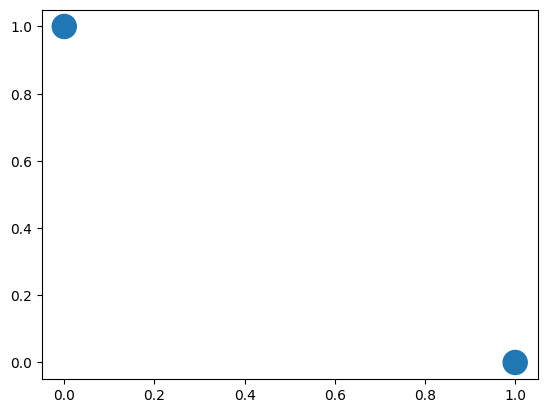

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#課題の解答はこの下に記入
def sigmoid(u):
    return 1/(1+np.exp(-u))
def neuron(a,n):
    x=a.copy()
    x.append(-1)
    u=x @ w[n] 
    o=sigmoid(u)
    return o

x=[[0,0],[0,1],[1,0],[1,1]]  # ４種類（XORの４種類）の入力値（ー１の入力値は閾値用）
w=np.array([[10,10,6],[-10,-10,-12],[10,10,15]])  # ３個のニューロンのパラメータ（合計９個のパラメータ）
plotx=[0,0,1,1]
ploty=[0,1,0,1]
plotsize=[]
for i in x:
    b1=neuron(i,0)
    b2=neuron(i,1)
    a=[b1,b2]
    out=neuron(a,2)
    if out<0.5 :
        plotsize.append(0.0)
    else:
        plotsize.append(300.0)
plt.scatter(plotx,ploty,s=plotsize)


# 課題

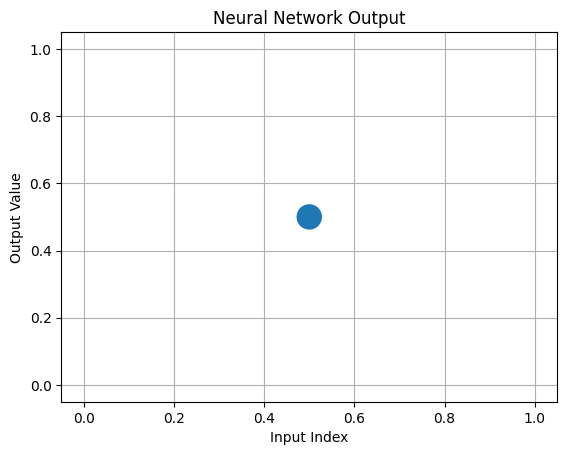

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# シグモイド関数とその導関数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def compute_output_with_learned_weights(input_data):
    # 順伝播
    layer1 = sigmoid(np.dot(input_data, weights1))
    output = sigmoid(np.dot(layer1, weights2))
    return output

x = [
    [0, 0], [0, 0.5], [0, 1],
    [0.5, 0], [0.5, 0.5], [0.5, 1],
    [1, 0], [1, 0.5], [1, 1]
]

# 勾配降下法？で頑張って求めてみました（あんまりよくわかっていない）
weights1 = [
    [1.43642476, 1.44389249, -23.87867004, -4.61102169],
    [0.190902, 0.18345505, 12.62101136, 3.092514],
]
weights2 = [[-5.8954511], [-5.82563046], [-32.85718252], [35.82311971]]

# 出力の計算
outputs = [compute_output_with_learned_weights(np.array(i)) for i in x]

# 出力のプロット
plotx = [i[0] for i in x]
ploty = [i[1] for i in x]
plotsize = [300.0 if out > 0.5 else 0.0 for out in outputs]

plt.scatter(plotx, ploty, s=plotsize)
plt.title('Neural Network Output')
plt.xlabel('Input Index')
plt.ylabel('Output Value')
plt.grid(True)
plt.show()
